### 데이터 전처리 및 이상치 탐지

본 코드에서는 쇼핑 트렌드 데이터를 전반적으로 전처리하고 분석했습니다. 주요 작업은 데이터 로딩, 데이터 정리, 이상치 탐지 및 처리이며, 구체적인 단계는 다음과 같습니다:

1. **데이터 로딩**:
   - 지정된 CSV 파일에서 데이터를 Pandas 데이터프레임 `df`로 로딩하고, 데이터의 기본 정보와 첫 몇 개의 샘플 데이터를 출력합니다.

2. **결측치 확인**:
   - `.isnull().sum()` 메서드를 사용하여 각 열에서 결측치의 수를 계산하고, 후속 결측치를 채우기 위한 준비를 합니다.

3. **데이터 타입 변환**:
   - 주요 숫자형 열(예: "Purchase Amount (USD)", "Review Rating")을 숫자형으로 변환하여 이후 통계 및 계산의 정확성을 보장합니다.
   - 변환할 수 없는 데이터(유효하지 않은 값 등)는 NaN(결측값)으로 설정됩니다.

4. **이상치 탐지**:
   - 사분위 범위(IQR) 규칙을 기반으로 숫자형 열에서 이상치를 탐지합니다.
   - IQR(Q3 - Q1)을 계산하고, Q1 - 1.5×IQR과 Q3 + 1.5×IQR로 정의된 상하 한계를 기준으로 이상치가 있는 행을 식별합니다.
   - 이상치 통계를 출력하여 추가 분석을 돕습니다.

5. **결측치 채우기**:
   - 결측치에 대해 적절한 채우기 방법을 선택합니다:
     - "Review Rating" 열에 대해서는 평균으로 채웁니다.
     - "Purchase Amount (USD)" 열에 대해서는 중앙값으로 채웁니다.
   - 채우기 작업은 `fillna()` 메서드를 통해 수행되어 데이터 완전성을 보장합니다.

위 단계를 통해 데이터의 품질이 크게 향상되었으며, 후속 데이터 분석 및 모델링을 위한 기초가 마련되었습니다.


In [1]:
import pandas as pd
import numpy as np

# 데이터 로딩
file_path = 'shopping_trends.csv'
df = pd.read_csv(file_path)

# 데이터 기본 정보 확인
print("데이터 개요:")
print(df.info())
print("\n데이터 미리보기:")
print(df.head())

# 결측치 확인
missing_values = df.isnull().sum()
print("\n결측치 통계:")
print(missing_values)

# 숫자형 열 데이터 타입 변환
numeric_columns = ["Purchase Amount (USD)", "Review Rating"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 이상치 탐지 및 처리
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n열 {col}의 이상치 통계:")
    print(outliers)

# 결측치 채우기 (있을 경우)
df.fillna({
    "Review Rating": df["Review Rating"].mean(),  # 평균으로 채우기
    "Purchase Amount (USD)": df["Purchase Amount (USD)"].median()  # 중앙값으로 채우기
}, inplace=True)


데이터 개요:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  

### 데이터 통계 설명 및 고유 값 분석

이 부분 코드에서는 데이터에 대해 기본적인 통계 설명과 고유 값 분석을 수행하였습니다. 구체적인 단계는 다음과 같습니다:

1. **전체 통계 설명**:
   - `df.describe()` 메서드를 사용하여 데이터프레임의 수치형 열에 대한 통계 요약 정보를 생성합니다.
   - 여기에는 개수(count), 평균(mean), 표준 편차(std), 최소값(min), 사분위수(25%, 50%, 75%) 및 최대값(max)이 포함됩니다.
   - 이러한 통계 정보는 데이터의 분포 특성, 중심 경향 및 분산 정도를 빠르게 파악하는 데 유용합니다.

2. **고유 값 통계**:
   - `df.nunique()` 메서드를 사용하여 데이터프레임의 각 열에 있는 고유 값의 수를 계산합니다.
   - 이 작업은 범주형 변수의 카테고리 수를 식별하거나 사용자 ID, 제품 이름과 같은 열의 다양성을 이해하는 데 도움이 됩니다.

이 부분의 통계 분석을 통해 데이터의 전체 구조와 특성을 빠르게 파악할 수 있으며, 이후 심층 분석에 대한 방향을 제시하는 데 도움이 됩니다.


In [2]:
# 전체 통계 설명
print("\n전체 통계 설명:")
print(df.describe())

# 고유 값 통계
print("\n각 열의 고유 값 수:")
print(df.nunique())



전체 통계 설명:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  

각 열의 고유 값 수:
Customer ID                 3900
Age                           53

### 카테고리별 총 구매 금액, 평균 금액 및 구매 횟수 통계

이 코드 부분에서는 상품 카테고리(`Category`)에 따라 구매 금액을 그룹화하여 통계 분석을 진행합니다. 구체적인 단계는 다음과 같습니다:

1. **그룹화 통계**:
   - `groupby("Category")` 메서드를 사용하여 데이터를 카테고리별로 그룹화합니다.
   - 그룹화된 데이터에서 `Purchase Amount (USD)` 열을 선택하여 여러 가지 집계 함수를 적용합니다:
     - `sum`: 각 카테고리의 총 구매 금액을 계산합니다.
     - `mean`: 각 카테고리의 평균 구매 금액을 계산합니다.
     - `count`: 각 카테고리의 구매 기록 수를 계산합니다.

2. **인덱스 리셋**:
   - `reset_index()` 메서드를 사용하여 그룹화 결과를 다중 인덱스에서 일반적인 데이터프레임 형식으로 변환하여 이후 작업과 표시가 용이하도록 합니다.

3. **열 이름 변경**:
   - 집계된 열 이름을 직관적으로 변경합니다:
     - `sum`을 `Total_Purchase_Amount` (총 구매 금액)으로 변경합니다.
     - `mean`을 `Average_Purchase_Amount` (평균 구매 금액)으로 변경합니다.
     - `count`를 `Purchase_Count` (구매 기록 수)로 변경합니다.

4. **결과 출력**:
   - 그룹화된 통계 결과 테이블을 출력하여 각 카테고리의 총 구매 금액, 평균 금액 및 구매 횟수를 명확하게 표시합니다.

이 분석을 통해 각 카테고리별 구매 금액 분포와 상대적인 인기도를 파악할 수 있으며, 비즈니스 의사결정 및 상품 최적화를 위한 데이터 지원을 제공합니다.


In [3]:
# 카테고리별 총 구매 금액 및 평균 금액 통계
category_summary = df.groupby("Category")["Purchase Amount (USD)"].agg(['sum', 'mean', 'count']).reset_index()
category_summary.rename(columns={"sum": "Total_Purchase_Amount", "mean": "Average_Purchase_Amount", "count": "Purchase_Count"}, inplace=True)
print("\n카테고리별 그룹화 통계:")
print(category_summary)



카테고리별 그룹화 통계:
      Category  Total_Purchase_Amount  Average_Purchase_Amount  Purchase_Count
0  Accessories                  74200                59.838710            1240
1     Clothing                 104264                60.025331            1737
2     Footwear                  36093                60.255426             599
3    Outerwear                  18524                57.172840             324


### 성별과 평균 구매 금액 및 계절과 평가 점수의 교차 분석

이 부분의 코드에서는 두 가지 차원에서 교차 분석을 수행하여 숨겨진 소비 행동 규칙과 사용자 평가 트렌드를 발견하려고 합니다:

#### 1. **성별과 평균 구매 금액의 관계**
   - **그룹별 계산**:
     - `groupby("Gender")` 메서드를 사용하여 데이터를 성별로 그룹화합니다.
     - 각 그룹의 `Purchase Amount (USD)` 열에 대해 평균값을 계산하여 각 성별의 평균 구매 금액을 구합니다.
   - **인덱스 재설정**:
     - `reset_index()`를 사용하여 그룹화 결과를 일반 데이터프레임으로 변환하여 쉽게 표시하고 분석할 수 있습니다.
   - **결과 출력**:
     - 결과는 각 성별 사용자들의 평균 구매 금액 차이를 보여주며, 성별이 소비 행동에 미치는 영향을 이해하는 데 도움이 됩니다.

#### 2. **계절과 평가 점수의 관계**
   - **그룹별 계산**:
     - `groupby("Season")` 메서드를 사용하여 데이터를 계절별로 그룹화합니다.
     - 각 그룹의 `Review Rating` 열에 대해 평균값을 계산하여 각 계절의 평균 평가 점수를 구합니다.
   - **인덱스 재설정**:
     - `reset_index()`를 사용하여 그룹화 결과를 일반 데이터프레임으로 변환하여 쉽게 표시하고 분석할 수 있습니다.
   - **결과 출력**:
     - 결과는 각 계절별 평균 사용자 평가 점수 차이를 보여주며, 사용자가 각 계절에서의 만족도 변화를 이해하는 데 직관적인 근거를 제공합니다.

이 두 가지 교차 분석을 통해 성별이 구매 행동에 미치는 영향과 계절적 요인이 사용자 평가에 미치는 영향을 더 깊이 이해할 수 있으며, 개인화된 마케팅과 계절별 최적화를 위한 데이터 지원을 제공합니다.


In [4]:
# 성별과 평균 구매 금액 교차 분석
gender_purchase = df.groupby("Gender")["Purchase Amount (USD)"].mean().reset_index()
print("\n성별과 평균 구매 금액 관계:")
print(gender_purchase)

# 계절과 평가 점수 교차 분석
season_rating = df.groupby("Season")["Review Rating"].mean().reset_index()
print("\n계절과 평가 점수 관계:")
print(season_rating)



성별과 평균 구매 금액 관계:
   Gender  Purchase Amount (USD)
0  Female              60.249199
1    Male              59.536199

계절과 평가 점수 관계:
   Season  Review Rating
0    Fall       3.729949
1  Spring       3.790591
2  Summer       3.725654
3  Winter       3.752111


### 데이터 시각화: 구매 금액과 평가 점수의 분포 분석

이 부분의 코드는 데이터 시각화 기술을 통해 구매 금액의 분포 특성과 계절별 사용자 평가 점수의 차이를 분석합니다:

#### 1. **구매 금액 분포**
   - **히스토그램과 커널 밀도 추정 그래프 그리기**:
     - `sns.histplot()` 메서드를 사용하여 구매 금액의 분포 그래프를 그리고, 커널 밀도 추정 곡선(`kde=True`)을 추가합니다.
     - 데이터 열은 `Purchase Amount (USD)`이고, 20개의 구간(`bins=20`)으로 나누어 데이터를 쉽게 분석할 수 있습니다.
     - 색상은 파란색(`color='blue'`)으로 설정합니다.
   - **그래프 최적화**:
     - 그래프 제목을 "구매 금액 분포"로 설정합니다.
     - x축을 "구매 금액 (USD)"로, y축을 "빈도"로 설정합니다.
     - 글꼴 크기 및 한글 지원을 설정하여 시각화 효과를 명확히 합니다.

#### 2. **계절별 평가 점수 분포**
   - **상자 그림 그리기**:
     - `sns.boxplot()` 메서드를 사용하여 평가 점수의 상자 그림을 그리고, 계절(`Season`)별로 그룹화합니다.
     - 데이터 열은 `Review Rating`이며, 색상 팔레트는 부드러운 색상(`palette="Set2"`)을 사용합니다.
     - 상자 그림은 각 계절의 평가 점수 분포 범위, 사분위수, 잠재적 이상치를 보여줍니다.
   - **그래프 최적화**:
     - 그래프 제목을 "계절별 평가 점수 분포"로 설정합니다.
     - x축을 "계절", y축을 "평가 점수"로 설정합니다.
     - 한글 글꼴 표시 및 음수 기호 문제를 조정하여 전체 시각적 효과를 개선합니다.

#### 시각화 목표
- **구매 금액 분포**:
  - 소비 행동의 집중 영역을 식별하고, 소비 금액에 뚜렷한 비대칭 분포나 이상치가 있는지 확인하는 데 도움을 줍니다.
- **평가 점수와 계절 관계**:
  - 다양한 계절에 따른 사용자 평가 점수의 트렌드를 분석하여 서비스 및 제품 개선을 위한 계절별 데이터를 제공합니다.


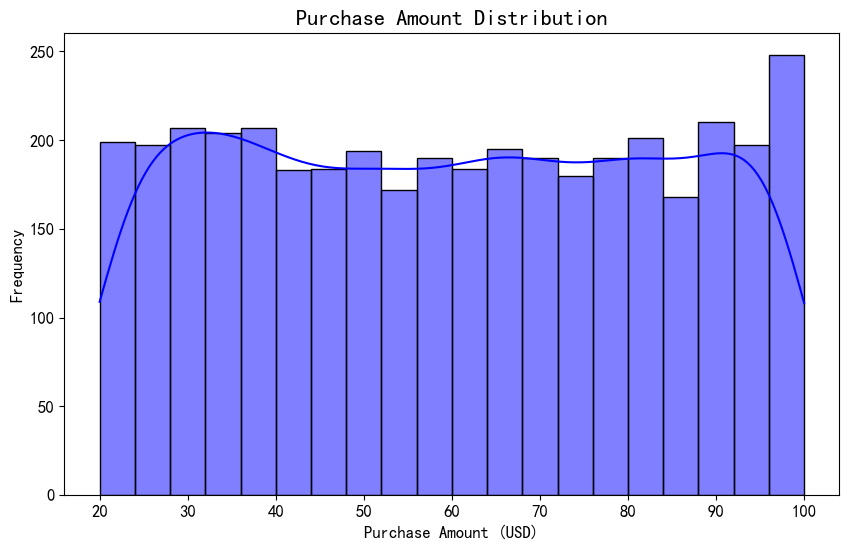

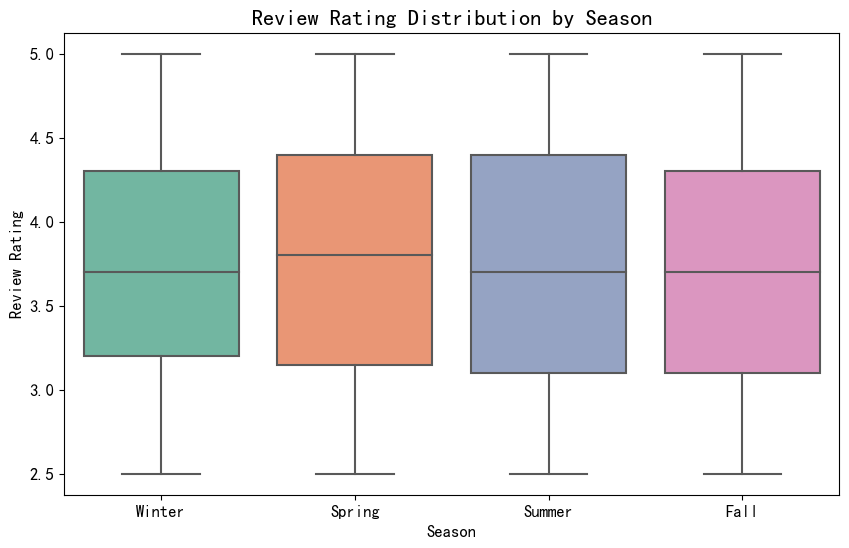

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib에서 한글 폰트 설정
plt.rcParams['font.sans-serif'] = ['SimHei']  # 한글 표시를 위한 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 이미지를 저장할 때 음수 '-'가 사각형으로 표시되는 문제 해결
plt.rcParams['font.size'] = 12  # 폰트 크기 설정

# 구매 금액 분포
plt.figure(figsize=(10, 6))
sns.histplot(df["Purchase Amount (USD)"], bins=20, kde=True, color='blue')
plt.title("Purchase Amount Distribution", fontsize=16)
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.show()

# 계절별 평가 점수 분포
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Season", y="Review Rating", palette="Set2")
plt.title("Review Rating Distribution by Season", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Review Rating")
plt.show()


### 데이터 시각화: 카테고리별 총 구매 금액의 막대 그래프

이 코드에서는 각 상품 카테고리(Category)에 해당하는 총 구매 금액(Total Purchase Amount)을 막대 그래프를 통해 시각화하여 각 카테고리의 소비 수준을 직관적으로 파악할 수 있습니다.

#### 코드 설명:
1. **막대 그래프 그리기**:
   - `sns.barplot()` 메서드를 사용하여 카테고리별 총 구매 금액을 나타내는 막대 그래프를 그립니다.
   - 데이터는 이전에 계산된 `category_summary` 데이터프레임을 사용하며, x축은 상품 카테고리(Category), y축은 총 구매 금액(Total_Purchase_Amount)입니다.
   - 시각적 효과를 높이기 위해 색상 팔레트는 `viridis`로 설정합니다.

2. **그래프 최적화**:
   - 그래프 제목을 "각 카테고리 구매 총 금액"으로 설정하여 그래프 내용을 설명합니다.
   - 축 라벨을 조정하여 x축은 "카테고리", y축은 "구매 총 금액 (USD)"으로 설정합니다.
   - x축의 카테고리 라벨을 `rotation=45`로 회전시켜 카테고리 이름이 명확하게 표시되고 겹치지 않도록 합니다.
   - 그래프 크기를 `figsize=(12, 6)`로 설정하여 페이지에서 명확하게 표시되도록 합니다.

#### 시각화 목표:
- **비교 분석**:
  - 시각화를 통해 각 상품 카테고리의 구매 총 금액 차이를 비교 분석하고, 우수한 성과를 보인 카테고리를 찾습니다.
- **비즈니스 최적화**:
  - 상품 카테고리 최적화와 판매 전략 수립을 위한 데이터 지원을 제공하며, 높은 소비 카테고리에 자원을 집중합니다.


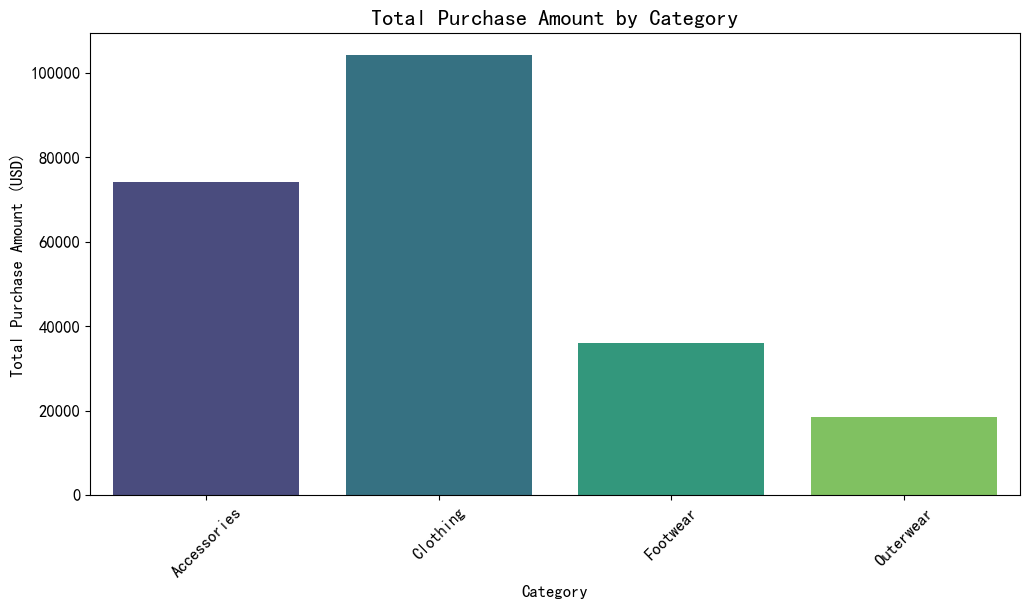

In [7]:
# 카테고리별 총 구매 금액의 막대 그래프
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.barplot(data=category_summary, x="Category", y="Total_Purchase_Amount", palette="viridis")  # 막대 그래프 그리기
plt.title("Total Purchase Amount by Category", fontsize=16)  # 그래프 제목 설정
plt.xlabel("Category")  # x축 라벨 설정
plt.ylabel("Total Purchase Amount (USD)")  # y축 라벨 설정
plt.xticks(rotation=45)  # x축 카테고리 라벨 회전
plt.show()  # 그래프 표시


### 데이터 시각화: 성별과 평균 구매 금액의 파이 차트

이 부분의 코드는 파이 차트를 사용하여 성별(Gender)에 따른 평균 구매 금액(Purchase Amount (USD))의 비율 분포를 보여주어 소비 행동에서 성별 차이를 분석하는 데 도움이 됩니다.

#### 코드 설명:
1. **파이 차트 그리기**:
   - Pandas의 `plot(kind='pie')` 메서드를 사용하여 파이 차트를 직접 그립니다. 데이터는 `gender_purchase` 데이터프레임에서 가져옵니다.
   - 성별 열을 인덱스로 설정(`set_index("Gender")`)하여 각 성별의 평균 구매 금액 비율을 표시합니다.
   - 파이 차트는 자동으로 백분율(`autopct='%1.1f%%'`)을 표시하며, 소수점 한 자리를 유지하여 성별별 소비 비율을 보여줍니다.

2. **그래프 최적화**:
   - 파이 차트의 시작 각도를 140도(`startangle=140`)로 설정하여 그래프의 레이아웃을 최적화합니다.
   - 색상 팔레트를 지정(`colors=["lightblue", "pink"]`)하여 성별 구분을 강화합니다. 파란색은 남성, 분홍색은 여성을 나타냅니다.
   - 그래프 제목을 "성별과 평균 구매 금액 비율"로 설정하고 기본 y축 라벨(`ylabel("")`)을 제거하여 그래프를 더 깔끔하게 만듭니다.
   - 그래프 크기를 8×8(`figsize=(8, 8)`)로 설정하여 파이 차트 비율을 더욱 균형 있게 만듭니다.

#### 시각화 목표:
- **소비 행동 분석**:
  - 성별에 따른 소비 비율을 분석하여 남성과 여성 소비자의 구매력 차이를 파악합니다.
- **시장 전략 수립**:
  - 높은 소비 성향을 보이는 성별 그룹에 맞춘 맞춤형 프로모션 활동을 위해 데이터 지원을 제공합니다.


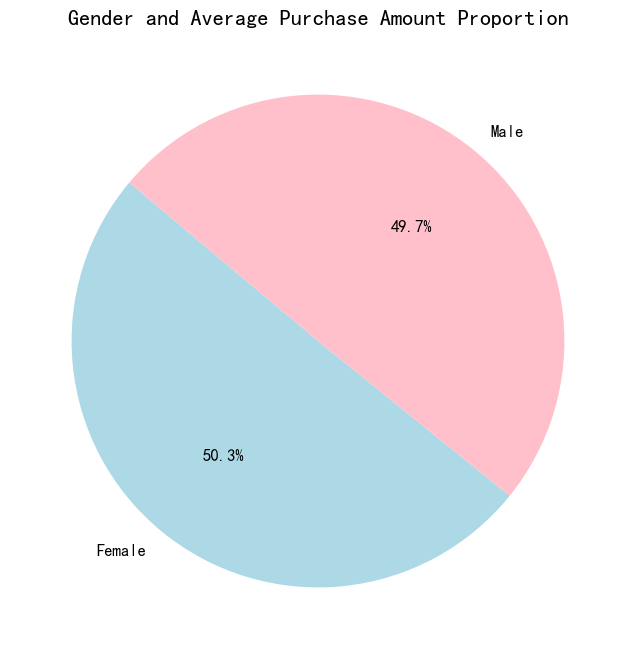

In [8]:
# 성별과 평균 구매 금액의 파이 차트
plt.figure(figsize=(8, 8))
gender_purchase.set_index("Gender")["Purchase Amount (USD)"].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=["lightblue", "pink"])
plt.title("Gender and Average Purchase Amount Proportion", fontsize=16)
plt.ylabel("")  # y축 레이블 제거
plt.show()


### 데이터 시각화: 계절별 구매 빈도의 막대 차트

이 코드 부분은 다양한 계절(Season)에서의 구매 빈도를 막대 차트로 보여주어 소비자가 각 계절에 얼마나 활발히 쇼핑하는지를 분석하는 데 도움이 됩니다.

#### 코드 설명:
1. **막대 차트 그리기**:
   - Seaborn의 `countplot` 함수를 사용하여 막대 차트를 그립니다. x 축은 계절(Season)을 나타내고, y 축은 구매 횟수를 나타냅니다.
   - `data=df`는 데이터가 원본 데이터프레임 `df`에서 온다는 것을 나타냅니다.
   - 색상 팔레트는 "coolwarm"(`palette="coolwarm"`)으로 설정하여 시각적 효과를 강조합니다.

2. **그래프 최적화**:
   - 그래프 크기는 10x6(`figsize=(10, 6)`)으로 설정하여 명확하게 표시됩니다.
   - 제목은 "계절별 구매 빈도"(`title="계절별 구매 빈도"`)로 설정하여 차트의 내용을 명확히 합니다.
   - x 축과 y 축 레이블은 각각 "계절"과 "구매 횟수"(`xlabel`과 `ylabel`)로 설정하여 차트의 가독성을 높입니다.

#### 시각화 목표:
- **구매 행동 분석**:
  - 막대 차트를 통해 소비자가 봄, 여름, 가을, 겨울 네 계절 동안 얼마나 활발히 구매하는지 직관적으로 알 수 있습니다.
  - 구매 빈도가 가장 높은 계절을 찾아 비즈니스의 계절 자원 투입에 대한 근거를 제공합니다.
- **마케팅 전략 최적화**:
  - 구매 활발도가 낮은 계절에 대해 프로모션 활동이나 특별 할인을 제공하여 소비자 구매를 자극할 수 있습니다.


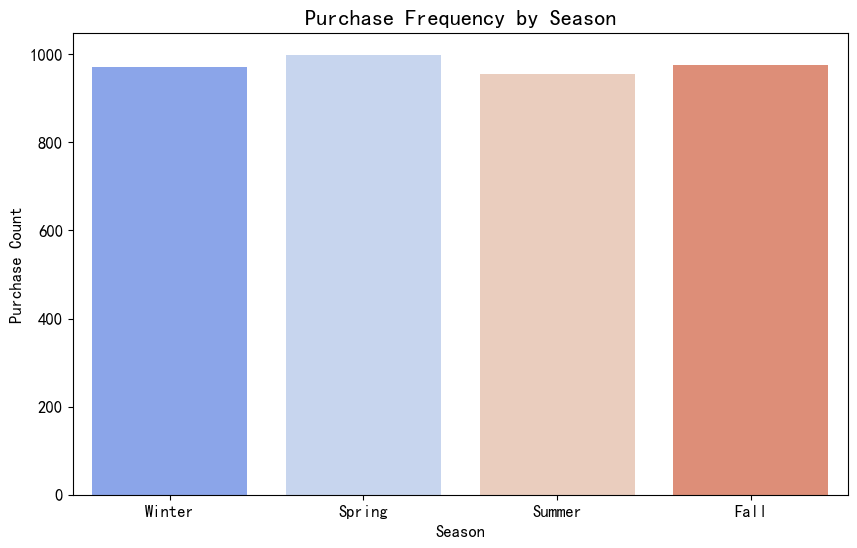

In [9]:
# 계절별 구매 빈도 막대 차트
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.countplot(data=df, x="Season", palette="coolwarm")  # 계절별 구매 빈도 계산 및 막대 차트 그리기
plt.title("Purchase Frequency by Season", fontsize=16)  # 그래프 제목 설정
plt.xlabel("Season")  # x축 레이블 설정
plt.ylabel("Purchase Count")  # y축 레이블 설정
plt.show()  # 그래프 출력


### KMeans 기반 고객 클러스터링 분석

본 코드에서는 KMeans 클러스터링 알고리즘을 사용하여 고객 데이터를 클러스터링하고, 각 클러스터의 분포 특성을 시각적으로 보여줍니다.

#### 코드 설명:

1. **특징 추출 및 표준화**:
   - 클러스터링 분석을 위해 데이터프레임에서 세 가지 특징을 추출합니다: `Age` (나이), `Purchase Amount (USD)` (구매 금액), `Review Rating` (평가 점수).
   - `StandardScaler`를 사용하여 특징을 표준화 처리합니다 (`scaled_features`), 이를 통해 특징의 단위 차이가 클러스터링 결과에 미치는 영향을 제거합니다.

2. **KMeans 클러스터링**:
   - KMeans 모델을 초기화하고 클러스터 수를 3개 (`n_clusters=3`)로 설정하며, 랜덤 시드를 42 (`random_state=42`)로 설정하여 결과를 재현할 수 있도록 합니다.
   - `fit_predict` 메서드를 사용하여 표준화된 특징 데이터를 클러스터링하고, 클러스터링 결과를 원본 데이터프레임의 `Cluster` 열에 저장합니다.

3. **클러스터링 결과 시각화**:
   - Seaborn의 `scatterplot` 함수를 사용하여 2D 산점도를 그립니다. x축은 고객의 나이 (`Age`), y축은 구매 금액 (`Purchase Amount (USD)`)입니다.
   - `hue="Cluster"` 파라미터를 사용하여 클러스터별로 색을 구분하며, 색상 팔레트는 `Set1`로 설정합니다.
   - 그래프 최적화:
     - 그래프 크기를 10×6 (`figsize=(10, 6)`)으로 설정합니다.
     - 제목을 “고객 클러스터링: 나이와 구매 금액”으로 추가합니다 (`title="고객 클러스터링: 나이와 구매 금액"`).
     - 축 레이블을 "나이"와 "구매 금액 (USD)"로 설정합니다.

#### 시각화 목표:
- **고객 그룹 분석**:
  - 각 색상이 다른 클러스터를 나타내며, 산점도를 통해 나이와 구매 금액에서의 각 클러스터 고객들의 분포 특성을 확인할 수 있습니다.
- **비즈니스 응용**:
  - 클러스터링 결과를 바탕으로 고객 군의 특성을 파악하고, 차별화된 마케팅 전략을 수립하는 데 도움을 줍니다 (예: 고액 구매 고객을 위한 맞춤형 서비스).


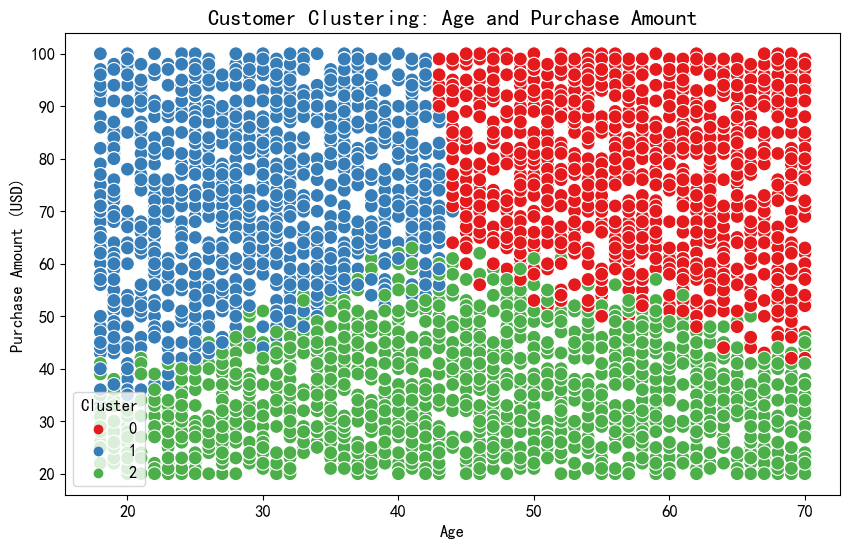

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 클러스터링에 사용할 특징 추출
features = df[["Age", "Purchase Amount (USD)", "Review Rating"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Purchase Amount (USD)", hue="Cluster", palette="Set1", s=100)
plt.title("Customer Clustering: Age and Purchase Amount", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.legend(title="Cluster")
plt.show()


### 데이터 저장 및 결과 출력

이 코드 부분에서는 데이터 처리 및 분석 결과를 CSV 파일로 저장하고, 결과를 아름답게 포맷하여 출력하여 후속 작업을 용이하게 합니다.

#### 코드 설명:

1. **분석 결과 저장**:
   - `category_summary`: 카테고리별 통계 데이터를 CSV 파일로 저장하며, 파일명은 `category_summary.csv`입니다.
   - `df`: 데이터 처리 후 완성된 데이터를 CSV 파일로 저장하며, 파일명은 `processed_shopping_trends.csv`입니다.
   - `to_csv` 메소드를 사용하여 데이터를 저장하고, `index=False` 파라미터는 행 인덱스를 저장하지 않도록 합니다.

2. **저장 정보 출력**:
   - 파일이 저장된 경로를 출력하여 사용자에게 다운로드 또는 추가 분석을 안내합니다.

3. **테이블 미화 및 출력**:
   - `tabulate` 라이브러리의 `fancy_grid` 형식을 사용하여 테이블을 미화하고, 카테고리별 통계 결과를 출력합니다.
   - `headers='keys'`는 데이터프레임의 열명을 헤더로 사용하며, `showindex=False`는 행 인덱스를 표시하지 않도록 설정합니다.

4. **처리된 데이터 출력**:
   - `IPython.display` 라이브러리의 `display` 메소드를 사용하여 데이터프레임 `df`의 첫 10개 행을 출력하여 사용자에게 처리된 데이터를 미리 볼 수 있게 합니다.

#### 목표 및 목적:
- **데이터 저장**:
  - 처리된 결과와 요약 통계 파일을 로컬에 저장하여 후속 분석이나 공유에 용이하게 합니다.
- **결과 출력**:
  - 미화된 테이블 출력을 통해 분석 결과를 보다 쉽게 읽을 수 있도록 하며, 특히 Jupyter Notebook에서 확인할 때 가독성을 높입니다.
  - 처리된 데이터의 첫 10개 행을 출력하여 사용자가 데이터를 직관적으로 미리 볼 수 있도록 합니다.


In [11]:
from IPython.display import display
from tabulate import tabulate  # 테이블 출력을 미화하기 위한 라이브러리 (설치 필요: pip install tabulate)

# 분석 결과 저장
category_summary_file = "category_summary.csv"
processed_file = "processed_shopping_trends.csv"
category_summary.to_csv(category_summary_file, index=False)
df.to_csv(processed_file, index=False)

# 저장된 정보 출력
print(f"The category summary statistics have been saved to: {category_summary_file}")
print(f"The processed complete data has been saved to: {processed_file}")

# 카테고리별 통계 테이블 미화하여 출력
print("\nCategory Summary Statistics Table:")
print(tabulate(category_summary, headers='keys', tablefmt='fancy_grid', showindex=False))

# 처리된 데이터의 첫 10행을 출력
print("\nProcessed Data (First 10 Rows Preview):")
display(df.head(10))


The category summary statistics have been saved to: category_summary.csv
The processed complete data has been saved to: processed_shopping_trends.csv

Category Summary Statistics Table:
╒═════════════╤═════════════════════════╤═══════════════════════════╤══════════════════╕
│ Category    │   Total_Purchase_Amount │   Average_Purchase_Amount │   Purchase_Count │
╞═════════════╪═════════════════════════╪═══════════════════════════╪══════════════════╡
│ Accessories │                   74200 │                   59.8387 │             1240 │
├─────────────┼─────────────────────────┼───────────────────────────┼──────────────────┤
│ Clothing    │                  104264 │                   60.0253 │             1737 │
├─────────────┼─────────────────────────┼───────────────────────────┼──────────────────┤
│ Footwear    │                   36093 │                   60.2554 │              599 │
├─────────────┼─────────────────────────┼───────────────────────────┼──────────────────┤
│ Outerwear  

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,2
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly,2
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly,0
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly,2
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually,1
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly,2


### 딥러닝 모델 구축 및 훈련

이 부분의 코드는 딥러닝 모델을 사용하여 사용자의 구매 금액을 예측하는 데 사용됩니다. 주요 단계에 대한 자세한 설명은 다음과 같습니다:

#### 1. **필요한 라이브러리 가져오기**:
   - **pandas**와 **numpy**는 데이터 처리와 수학적 연산에 사용됩니다.
   - **scikit-learn** 라이브러리의 `train_test_split`은 훈련 세트와 테스트 세트를 분리하는 데 사용되고, `StandardScaler`는 특성 데이터를 표준화하는 데 사용됩니다.
   - **TensorFlow**와 **Keras**는 딥러닝 모델을 구축, 훈련, 평가하는 데 사용됩니다.
   - **Matplotlib**는 훈련 과정에서 손실 및 평가 지표를 시각화하는 데 사용됩니다.

#### 2. **특성 및 목표 선택**:
   - `df` 데이터셋에서 특성(`Age`, `Review Rating`, `Previous Purchases`)과 목표(`Purchase Amount (USD)`)를 선택합니다.
   - 특성 행렬 `X`와 목표 벡터 `y`는 후속 모델 훈련을 위해 추출됩니다.

#### 3. **데이터 표준화**:
   - `StandardScaler`를 사용하여 특성 데이터를 표준화하여 평균 0, 표준편차 1로 조정합니다. 이는 딥러닝 모델의 훈련 속도를 가속화하는 데 도움을 줍니다.

#### 4. **훈련 세트와 테스트 세트로 분리**:
   - `train_test_split`을 사용하여 데이터셋을 훈련 세트와 테스트 세트로 분리하며, 훈련 세트는 80%, 테스트 세트는 20%로 설정합니다.

#### 5. **딥러닝 모델 구축**:
   - **모델 구조**:
     - 첫 번째 층은 입력층(128개의 뉴런, ReLU 활성화 함수), 그다음에는 두 개의 은닉층(64개와 32개의 뉴런, ReLU 활성화 함수)이 있으며, 각 층 뒤에는 **Dropout** 층이 있어 과적합을 방지합니다.
     - 마지막 층은 출력층이며, 연속적인 구매 금액(`Purchase Amount (USD)`)을 예측하기 위해 선형 활성화 함수가 사용됩니다.
   - **Adam** 옵티마이저와 **평균 제곱 오차**(MSE) 손실 함수로 모델을 컴파일하고, 평가 지표는 **평균 절대 오차**(MAE)로 설정됩니다.

#### 6. **모델 훈련**:
   - 훈련 데이터로 모델을 훈련시키며, 훈련 에포크는 50, 배치 크기는 32로 설정하고, 훈련 중에 훈련 과정에 대한 자세한 정보가 출력됩니다.
   - `validation_split=0.2`를 사용하여 훈련 데이터의 일부를 검증 데이터로 사용하여 훈련 과정에서 모델 성능을 모니터링합니다.

#### 7. **모델 평가**:
   - 테스트 세트에서 모델 성능을 평가하고, **MAE**를 출력합니다. 이는 예측 값과 실제 값 간의 평균 절대 오차로, 단위는 미국 달러입니다.

#### 8. **훈련 과정 시각화**:
   - 마지막으로 훈련 과정에서의 손실 값과 평가 지표를 차트로 그려 모델 훈련 효과를 더 직관적으로 확인할 수 있도록 합니다.

#### 목표 및 목적:
- 딥러닝 모델을 사용하여 회귀 작업을 수행하고, 사용자의 구매 금액을 예측합니다.
- 표준화 및 최적화 전략을 통해 모델 훈련의 안정성과 정확성을 높입니다.
- 훈련 과정 중 모델 성능을 시각화하여 모니터링합니다.


In [12]:
# 필요한 라이브러리 가져오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# 데이터 로드 (데이터는 df 변수에 이미 있음)
# df = pd.read_csv('shopping_trends.csv')

# 특성 및 목표 선택
features = ["Age", "Review Rating", "Previous Purchases"]
target = "Purchase Amount (USD)"
X = df[features]
y = df[target]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 딥러닝 모델 구축
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # 입력층 + 첫 번째 은닉층
    Dropout(0.3),  # 과적합 방지
    Dense(64, activation='relu'),  # 두 번째 은닉층
    Dropout(0.2),
    Dense(32, activation='relu'),  # 세 번째 은닉층
    Dense(1)  # 출력층: 예측 값
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 모델 훈련
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,  # 훈련 횟수 설정
    batch_size=32,
    verbose=1
)

# 모델 평가
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 세트에서 MAE: {mae:.2f} USD")

# 훈련 과정 시각화
plt.figure(figsize=(12, 5))


Epoch 1/50
78/78 [==============================] - 1s 3ms/step - loss: 2897.1338 - mae: 47.0225 - val_loss: 693.4794 - val_mae: 21.9410
Epoch 2/50
78/78 [==============================] - 0s 1ms/step - loss: 723.6826 - mae: 22.5324 - val_loss: 640.0850 - val_mae: 21.3219
Epoch 3/50
78/78 [==============================] - 0s 1ms/step - loss: 676.7569 - mae: 21.8281 - val_loss: 623.1402 - val_mae: 21.1636
Epoch 4/50
78/78 [==============================] - 0s 1ms/step - loss: 665.3994 - mae: 21.7665 - val_loss: 601.0942 - val_mae: 20.8787
Epoch 5/50
78/78 [==============================] - 0s 2ms/step - loss: 643.6373 - mae: 21.4283 - val_loss: 586.9792 - val_mae: 20.7395
Epoch 6/50
78/78 [==============================] - 0s 1ms/step - loss: 632.8759 - mae: 21.3784 - val_loss: 579.9062 - val_mae: 20.7170
Epoch 7/50
78/78 [==============================] - 0s 1ms/step - loss: 633.6547 - mae: 21.3686 - val_loss: 575.4261 - val_mae: 20.6768
Epoch 8/50
78/78 [=============================

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

### 모델 평가 및 예측 결과 시각화

이 부분에서는 딥러닝 모델의 훈련 과정을 추가로 분석하고, 모델이 테스트 세트에서 예측한 결과를 시각화합니다. 아래는 각 부분에 대한 상세 설명입니다:

#### 1. **훈련 및 검증 손실 값 그리기**:
   - 훈련 과정에서 우리는 훈련 세트와 검증 세트의 손실 값을 그려 모델의 성능을 모니터링합니다.
   - **손실 함수**: 우리는 평균 제곱 오차(MSE)를 손실 함수로 사용하며, `history.history['loss']`와 `history.history['val_loss']` 곡선을 그려 훈련 세트와 검증 세트에서의 손실 값을 나타냅니다.
   - 손실 곡선의 변화를 살펴봄으로써 모델이 과적합(overfitting) 또는 과소적합(underfitting) 문제를 겪고 있는지 판단할 수 있습니다. 이상적으로는 훈련 손실과 검증 손실이 훈련이 진행될수록 점차 감소해야 합니다.

#### 2. **훈련 및 검증의 평균 절대 오차(MAE) 그리기**:
   - 또한 훈련 세트와 검증 세트의 평균 절대 오차(MAE) 곡선을 그려 모델의 예측 정확도를 평가합니다.
   - **MAE**: 모델의 예측 값과 실제 값 간의 차이를 측정하는 지표로, 값이 낮을수록 모델이 더 정확함을 의미합니다.
   - `history.history['mae']`와 `history.history['val_mae']` 곡선을 그려 훈련 세트와 검증 세트에서의 평균 절대 오차를 나타냅니다.

#### 3. **모델 예측 예시**:
   - 모델의 예측 성능을 직관적으로 보여주기 위해, 우리는 테스트 세트에서 처음 10개의 데이터를 선택하여 예측합니다.
   - `model.predict()` 메서드를 사용하여 이 테스트 데이터의 예측 값을 얻고, 이를 실제 값과 비교하여 `DataFrame`에 표시합니다.
   - 이 비교는 모델이 특정 샘플에서 어떻게 동작하는지, 예측 능력을 평가하는 데 도움이 됩니다.

#### 4. **실제 값과 예측 값 비교 시각화**:
   - 실제 값과 예측 값을 비교하는 선 그래프를 그립니다. 그래프의 두 개의 선은 각각 실제 값과 모델 예측 값이 서로 다른 샘플에서 어떻게 변화하는지 나타냅니다.
   - 이 시각화 차트는 모델 예측의 정확도를 분석하는 데 도움이 되며, 어떤 샘플에서 예측 오차가 큰지 확인하고 모델을 최적화하는 데 유용합니다.

#### 목표 및 목적:
- **모델 훈련 효과 평가**: 손실 값과 MAE 곡선을 통해 모델이 적절하게 훈련되었는지 판단합니다.
- **모델 예측 능력 보여주기**: 예측 값과 실제 값의 비교를 통해 모델이 실제 환경에서 어떻게 동작하는지 보여줍니다.
- **모델 결과 시각화**: 비교 차트를 통해 모델이 다른 샘플에서 어떻게 예측했는지 더 직관적으로 이해할 수 있습니다.


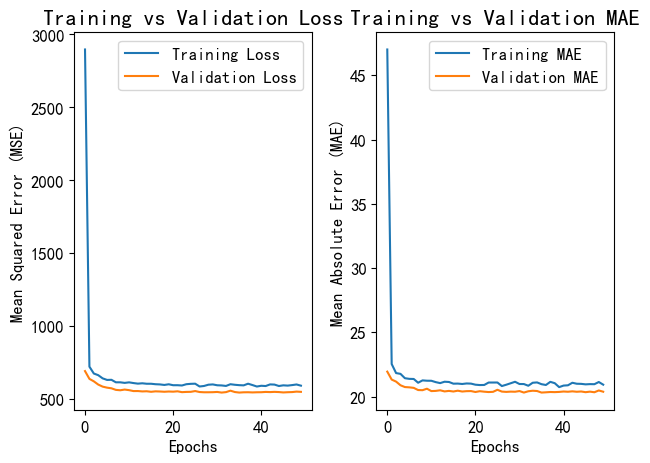

1/1 [==============================] - 0s 59ms/step

True vs Predicted Values:
   True Value (USD)  Predicted Value (USD)
0                31              57.918781
1                50              58.362614
2                36              59.869125
3                72              57.797928
4                38              56.427876
5                36              58.084953
6                83              59.976841
7                70              56.466908
8                41              58.613136
9                46              61.537983


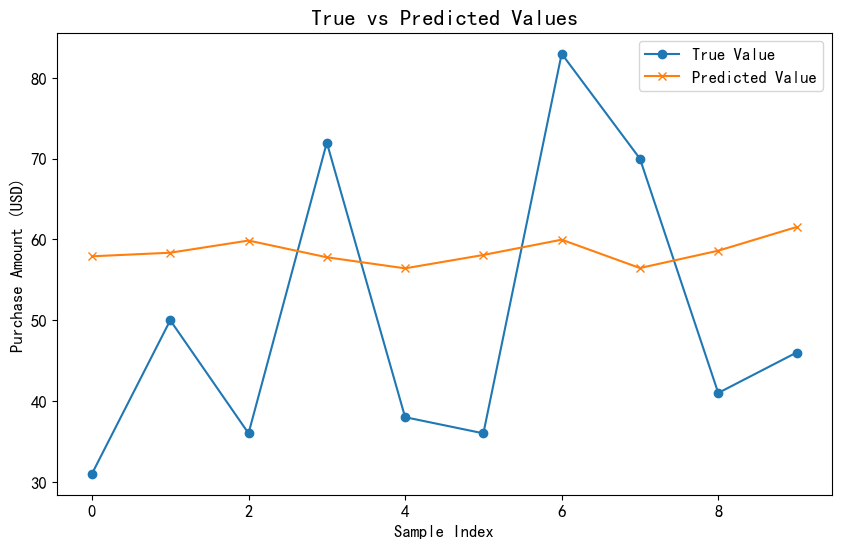

In [13]:
# 훈련 및 검증 손실 값 그리기
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss', fontsize=16)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

# 훈련 및 검증 평균 절대 오차(MAE) 그리기
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training vs Validation MAE', fontsize=16)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

# 모델 예측 예시
predictions = model.predict(X_test[:10])  # 첫 10개 테스트 데이터를 예측
results = pd.DataFrame({
    "True Value (USD)": y_test[:10].values,
    "Predicted Value (USD)": predictions.flatten()
})
print("\nTrue vs Predicted Values:")
print(results)

# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(len(results)), results["True Value (USD)"], label='True Value', marker='o')
plt.plot(range(len(results)), results["Predicted Value (USD)"], label='Predicted Value', marker='x')
plt.title("True vs Predicted Values", fontsize=16)
plt.xlabel("Sample Index")
plt.ylabel("Purchase Amount (USD)")
plt.legend()
plt.show()
